In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import explore as e
from importlib import reload
import wrangle as w
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.cluster import KMeans

In [3]:
reload(w)
df = w.wrangle_zillow(prop_row=.75,prop_col=.5)


In [4]:
train, validate, test = w.tvt_split(df)

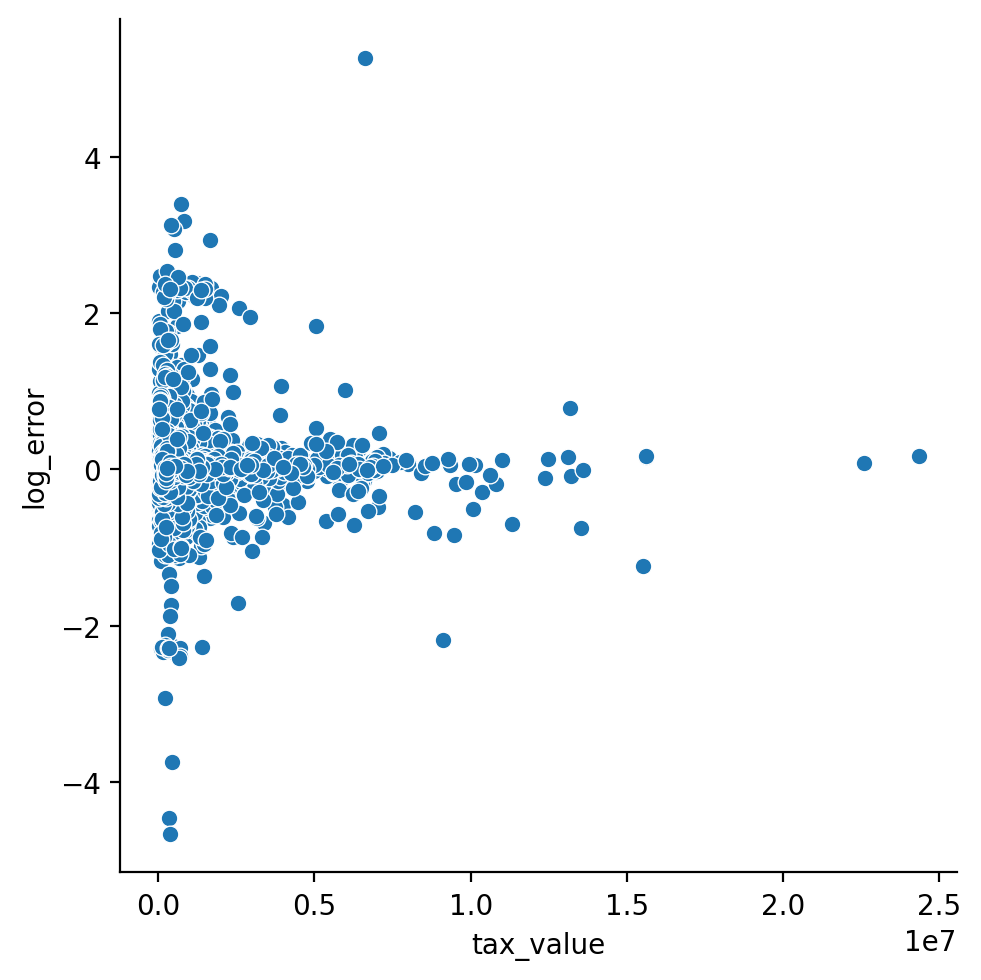

In [5]:

sns.relplot(data=train, x='tax_value', y='log_error')

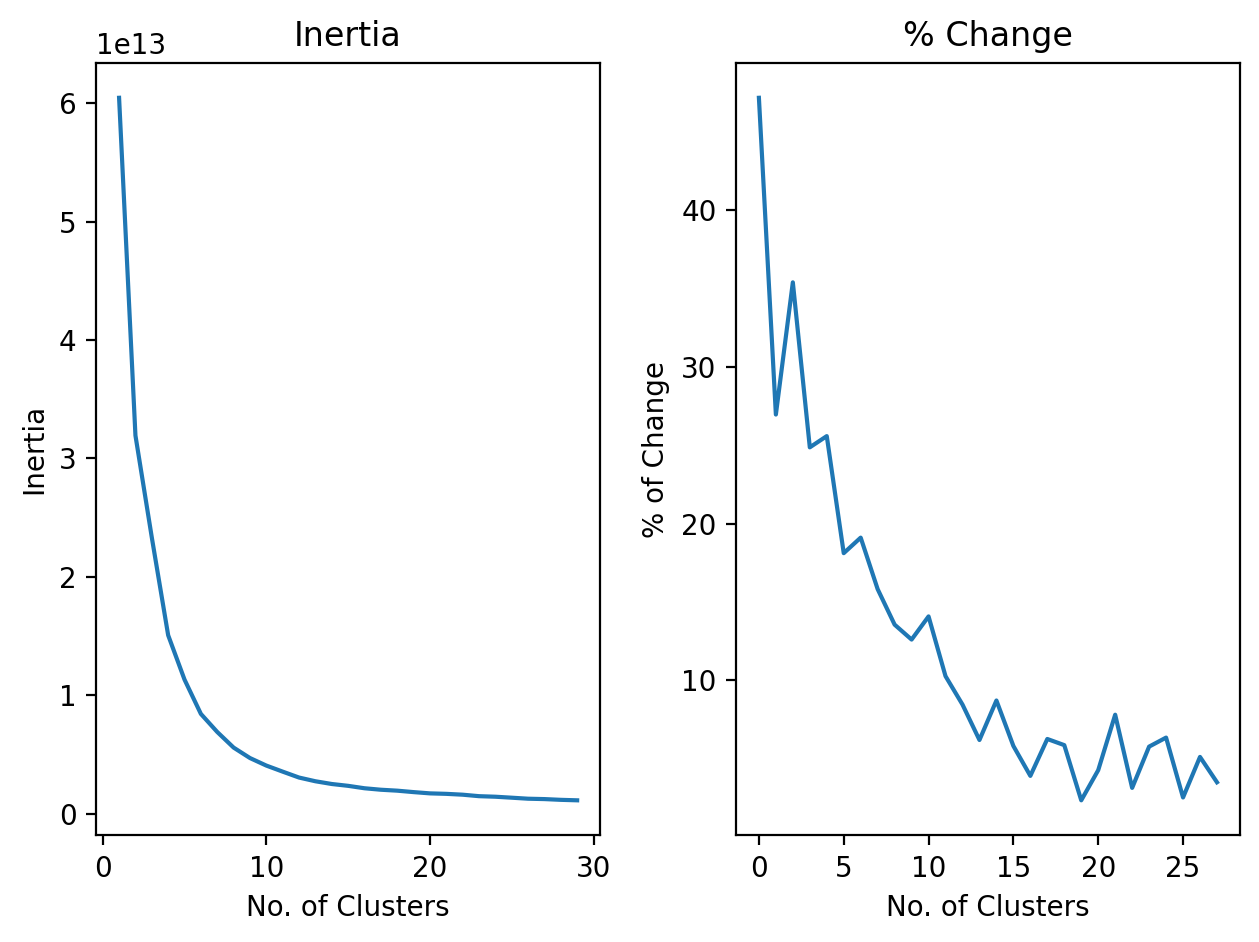

In [39]:
reload(e)
scaled_tudes = train[['latitude','longitude']][train.outliers == 'in_range']
e.generate_elbow(scaled_tudes)

(349, 36)

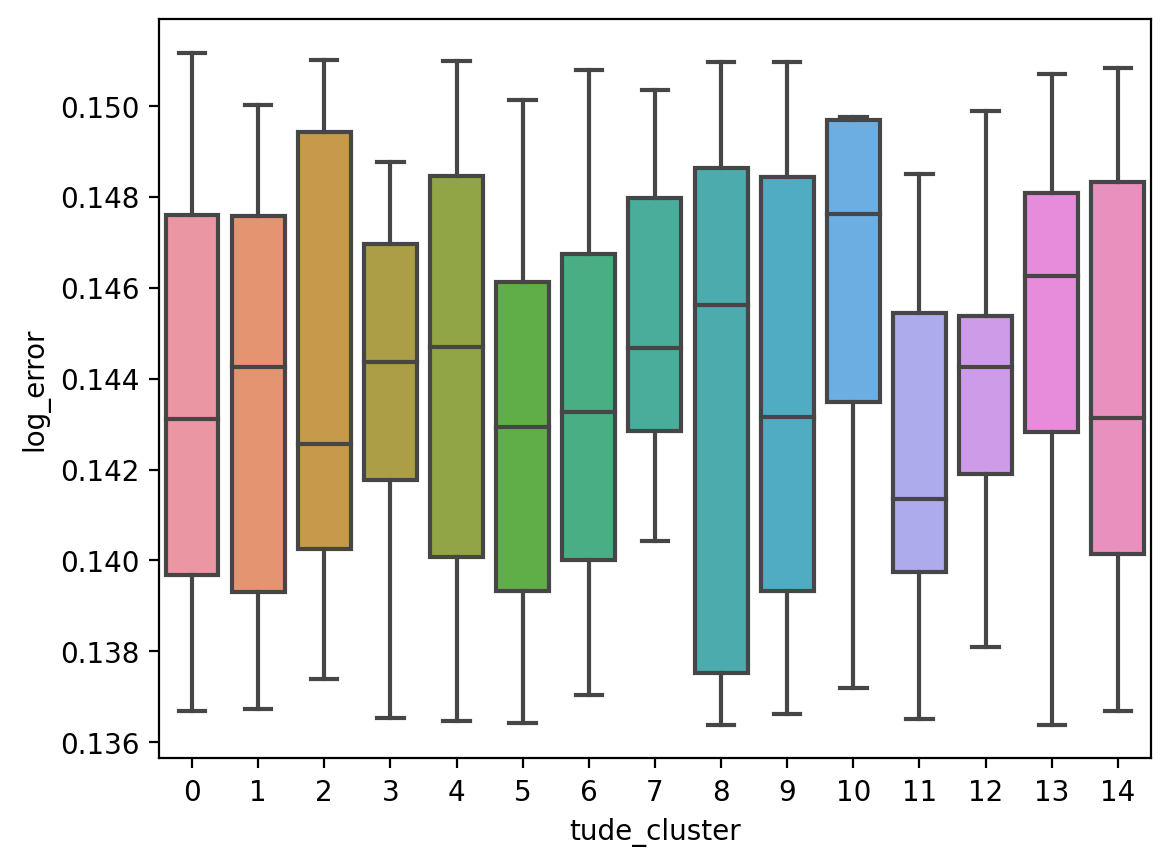

In [43]:
kmeans = KMeans(15)
kmeans.fit(scaled_tudes)
scaled_tudes['tude_cluster'] = kmeans.predict(scaled_tudes)
scaled_tudes['log_error'] = train[train.outliers =='in_range'].log_error
sns.boxplot(data=scaled_tudes,y='log_error',x='tude_cluster')
train[train.outliers == 'in_range'].shape